# Introduction
State notebook purpose here

### Imports
Import libraries and write settings here.

In [1]:

import seaborn as sb
import numpy as np
import pandas as pd
import pickle
from scipy.spatial import distance

from sklearn.metrics import roc_curve, auc, matthews_corrcoef, roc_auc_score, accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix
# Hyperparameter tuning

# Visualizations
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
# Set default font size
plt.rcParams['font.size'] = 24
# Set default font size
sb.set(font_scale=.8)
custom_style = {'axes.labelcolor': 'black',
                'xtick.color': 'black',
                'ytick.color': 'black'}
sb.set_style("white", rc=custom_style)

# Analysis/Modeling
Do work here

In [2]:
target_col =  "Cetuximab_Standard_3wks_cat"
datadir = "../../../dataset/5_McNemar_PDX_30x/"
tab_arr = []
auc_arr = []
split_index = 0
for split_index in range(30):
	# load the model from file
	suffix = str(split_index)
	f = "OmicsBinary_StackingCVClassifier_mutCross+clin+exprPROGENyHALLMARKS+highCNagg+MethK5cluster"
	modelFile = datadir + f + suffix + ".pkl"
	classifier = pickle.load(open(modelFile, 'rb'))
	# load test set
	f = "mutCross+clin+exprPROGENyHALLMARKS+highCNagg+MethK5cluster"
	XtestFile = datadir + f + suffix + "_Xtest.tsv"
	X_test = pd.read_csv(XtestFile, sep="\t", header=0, index_col=0)
	f = "OmicsBinary"
	YtestFile = datadir + f + suffix + "_Ytest.tsv"
	y_test = pd.read_csv(YtestFile, sep="\t", header=0,
				index_col=0)[target_col]
	y_test_predict_proba = classifier.predict_proba(X_test)
	fp_rates, tp_rates, _ = roc_curve(y_test,y_test_predict_proba[:,1])
	out_df = pd.DataFrame.from_dict({
		"replicate" : [suffix] * len(fp_rates),
		"fp_rate" : fp_rates,
		"tp_rate" : tp_rates
	})
	tab_arr.append(out_df)
	roc_auc = auc(fp_rates, tp_rates)
	auc_arr.append([suffix, roc_auc, 'StackedCVClassifier', 'PDX_test'])
rates1_df = pd.concat(tab_arr)
rates1_df["model"] = ['StackedCVClassifier'] * len(rates1_df)
rates1_df["test_set"] = ['PDX_test'] * len(rates1_df)
rates1_df.shape
rates1_df.head()

auc1_df = pd.DataFrame(auc_arr, 
	columns=['replicate', 'roc_auc', 'model', 'test_set'])

In [3]:
tab_arr = []
auc_arr = []
split_index = 0
for split_index in range(30):
	# load the model from file
	suffix = str(split_index)
	f = "OmicsBinary_StackingCVClassifier_mutCross+clin+exprPROGENyHALLMARKS+highCNagg+MethK5cluster"
	modelFile = datadir + f + suffix + ".pkl"
	classifier = pickle.load(open(modelFile, 'rb'))
	# load test set
	f = "CR_mutCross+clin+exprPROGENyHALLMARKS+highCNagg+MethK5cluster"
	XtestFile = datadir + f + suffix + "_Xtest.tsv"
	X_test = pd.read_csv(XtestFile, sep="\t", header=0, index_col=0)
	f = "CR_OmicsBinary"
	YtestFile = datadir + f + suffix + "_Ytest.tsv"
	y_test = pd.read_csv(YtestFile, sep="\t", header=0,
				index_col=0)
	y_test_predict_proba = classifier.predict_proba(X_test)
	fp_rates, tp_rates, _ = roc_curve(y_test,y_test_predict_proba[:,1])
	out_df = pd.DataFrame.from_dict({
		"replicate" : [suffix] * len(fp_rates),
		"fp_rate" : fp_rates,
		"tp_rate" : tp_rates
	})
	tab_arr.append(out_df)
	roc_auc = auc(fp_rates, tp_rates)
	auc_arr.append([suffix, roc_auc, 'StackedCVClassifier', 'CR_test'])
rates2_df = pd.concat(tab_arr)
rates2_df["model"] = ['StackedCVClassifier'] * len(rates2_df)
rates2_df["test_set"] = ['CR_test'] * len(rates2_df)
rates2_df.shape
rates2_df.head()

auc2_df = pd.DataFrame(auc_arr, 
	columns=['replicate', 'roc_auc', 'model', 'test_set'])

In [4]:
rates_df = pd.concat([rates1_df, rates2_df])
auc_df = pd.concat([auc1_df, auc2_df]) 

# Results
Show graphs and stats here

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
sb.lineplot(data=rates_df, 
        x="fp_rate", 
        y="tp_rate",
        hue='test_set',
        palette=['green', 'pink'],
        lw=1.5,
        ax=ax)

ax.plot([0, 1], [
        0, 1], 
        lw=1, 
        linestyle='--', 
        color='grey')

ax.legend()
ax.set_xlim([0.0, 1.01])
ax.set_ylim([0.0, 1])
ax.set_xlabel('False Positive Rate', size=13)
ax.set_ylabel('True Positive Rate', size=13)
ax.set_title('ROC Curve PDX (N=57) v CR (N=50) test set', size=15)
fig.savefig(f"externalValidation_aggregateROCAUC_PDXvCR_ROCcurve.pdf", format='pdf', 
            bbox_inches='tight', dpi=fig.dpi)
fig.savefig(f"externalValidation_aggregateROCAUC_PDXvCR_ROCcurve.png", format='png', 
            bbox_inches='tight', dpi=fig.dpi)

In [12]:
f = datadir + 'CR_mutCross+clin+exprPROGENyHALLMARKS+highCNagg+MethK5cluster0_Xtest.tsv'
X_test = pd.read_csv(f, sep='\t',
		header=0, index_col=0)
X_test['KRAS_BRAF_NRAS_triple_neg_mut'].value_counts()

1.0    49
0.0     1
Name: KRAS_BRAF_NRAS_triple_neg_mut, dtype: int64

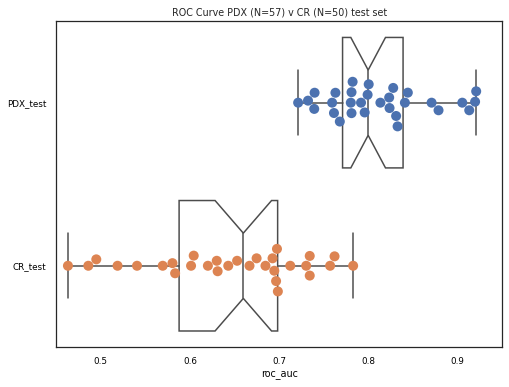

In [8]:

fig, ax = plt.subplots(figsize=(8,6))
fig.subplots_adjust(hspace=0.5)

ax = sb.boxplot(x="roc_auc", y="test_set", 
	notch=True, 
	data=auc_df, 
	boxprops={'facecolor':'None'}, 
	whis=np.inf, ax=ax)
ax = sb.swarmplot(x="roc_auc", y="test_set", 
	data=auc_df,
	s=10, ax=ax)
ax.set_title(f'ROC Curve PDX (N=57) v CR (N=50) test set')
ax.set_xlim(.45,.95)

ax.set_ylabel('')
fig.savefig(f"externalValidation_aggregateROCAUC_PDXvCR_boxplot.pdf", format='pdf', 
            bbox_inches='tight', dpi=fig.dpi)
fig.savefig(f"externalValidation_aggregateROCAUC_PDXvCR_boxplot.png", format='png', 
            bbox_inches='tight', dpi=fig.dpi)

# Conclusions and Next Steps
Summarize findings here